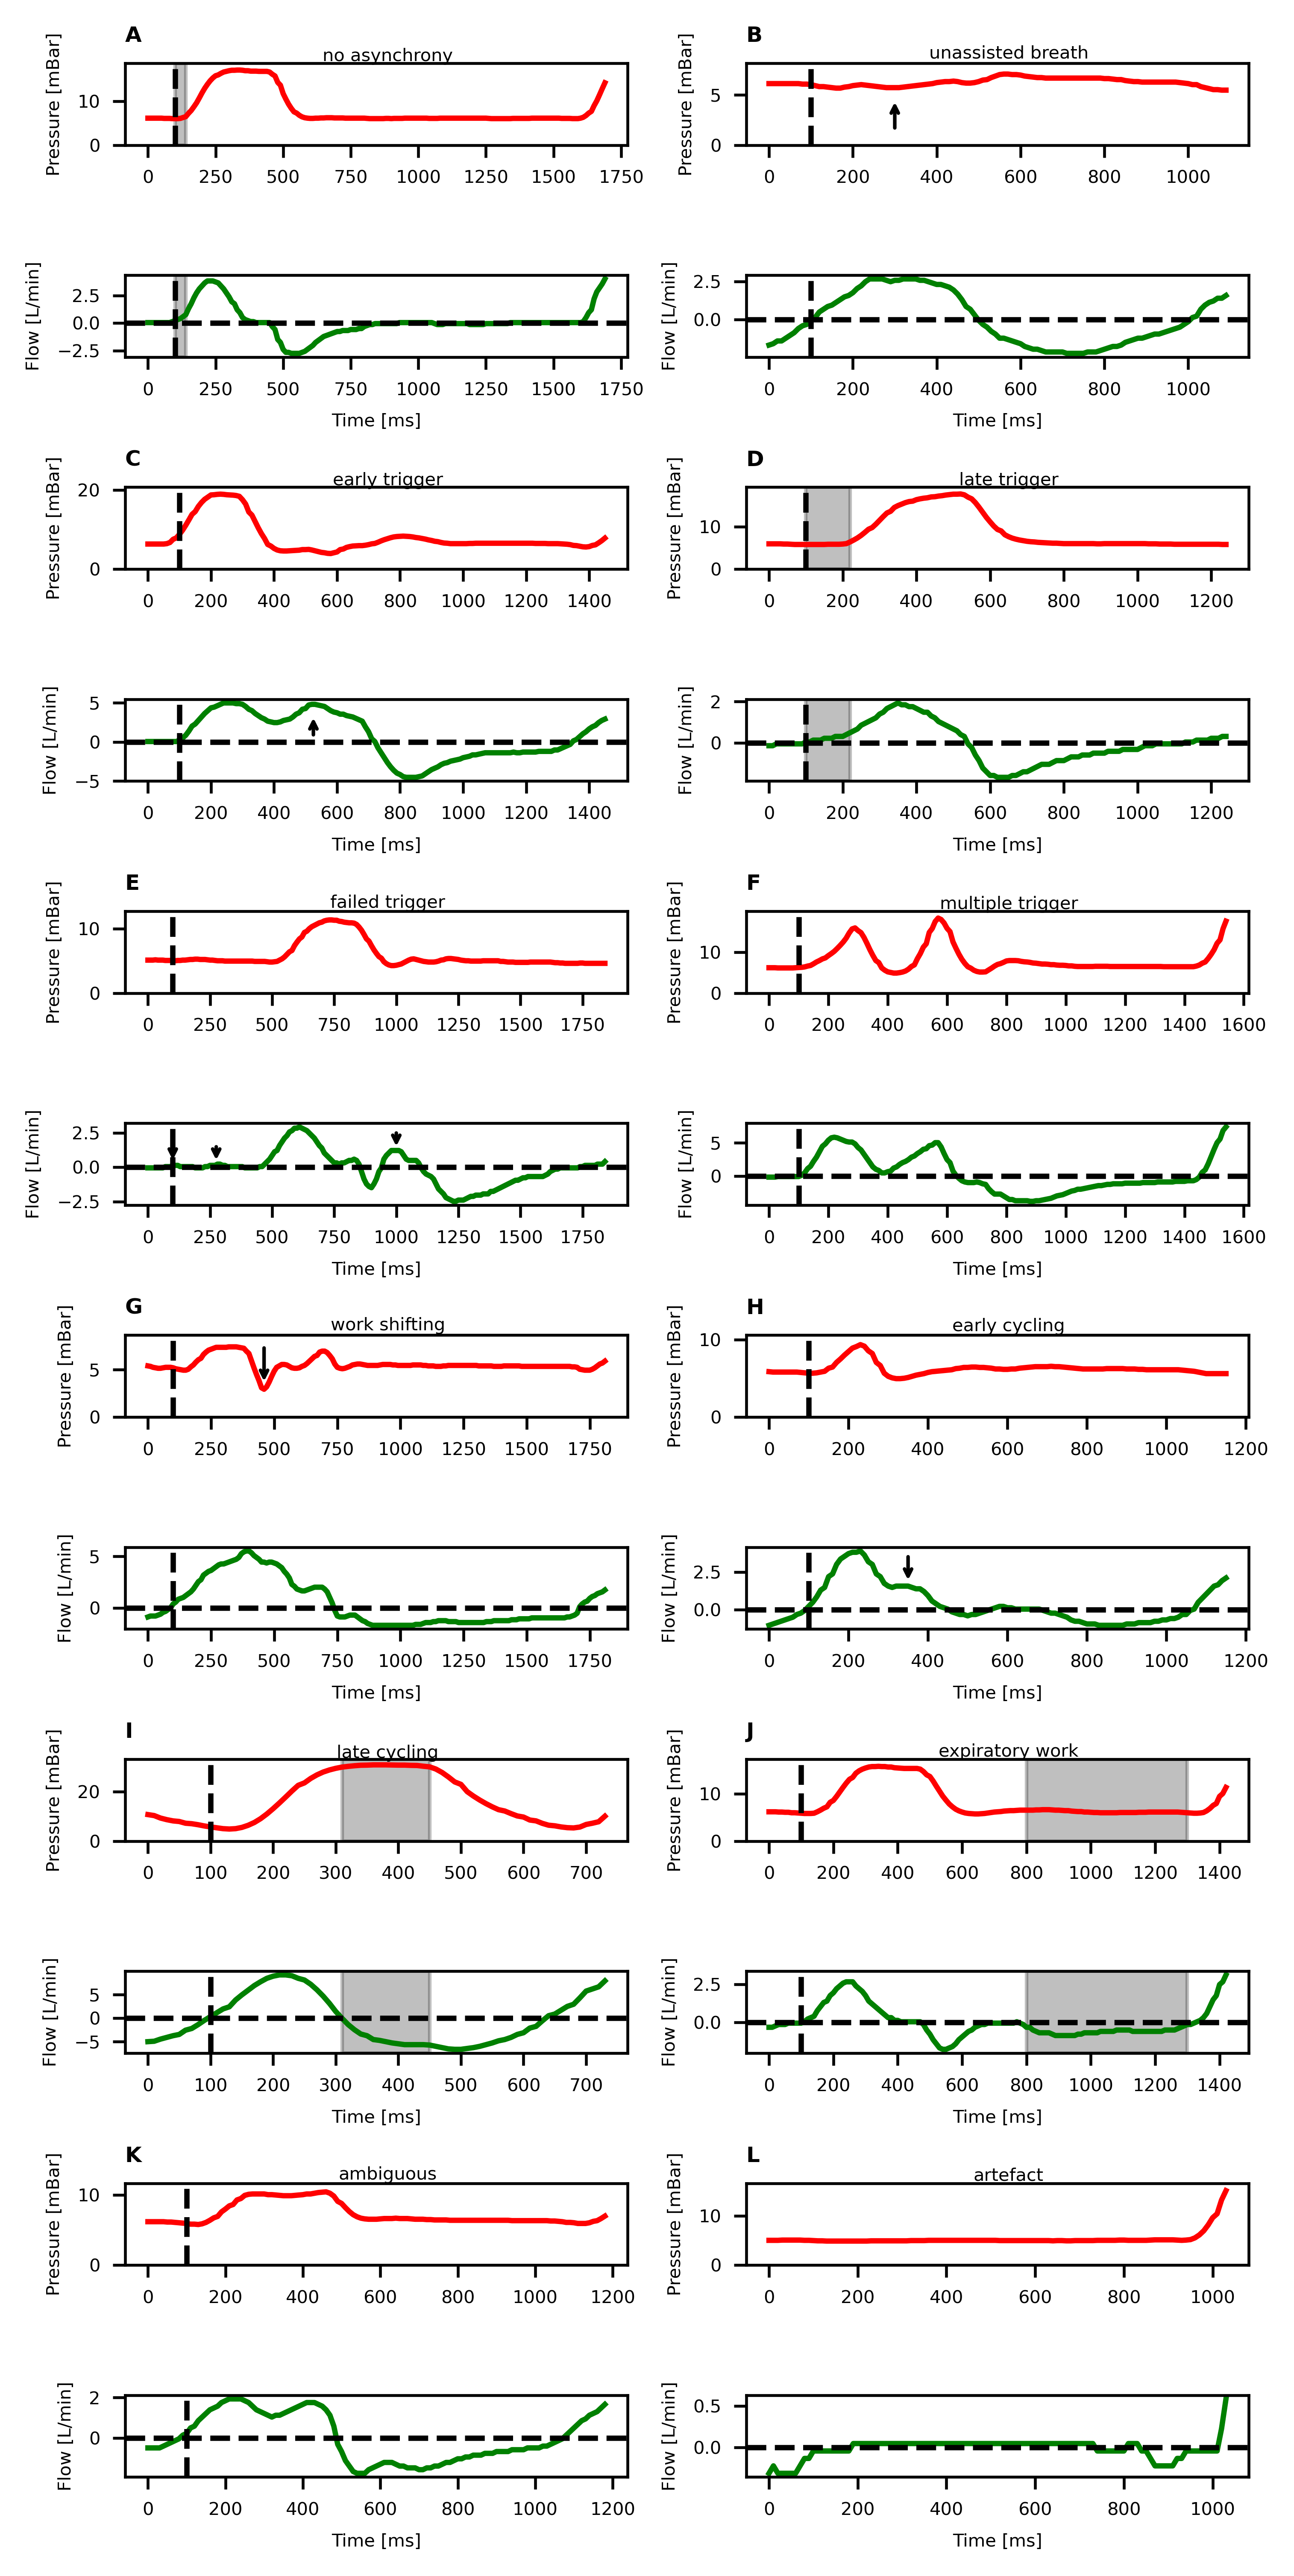

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

df = pd.read_csv("../data/train/combined.csv")
ws = pd.read_csv("../data/train/waveforms.csv")
df = df.rename({"splinting" : "ambiguous"}, axis=1)

def plot_breath(ax, i, j, b, h, df, ws, rs, plot_breath_start=True):
    idx = df.loc[df[b] == 1][["Sample","original_index"]].sample(1, random_state = rs)
    w = ws.loc[(ws["Sample"] == idx.iat[0,0]) & (ws["original_index"] == idx.iat[0,1])]
    ax[i, j].plot(range(0, w.shape[0]*10, 10), w.iloc[:,1], color="red")
    ax[i, j].set_ylim((0,ax[i, j].get_ylim()[1] + 1))
    ax[i, j].set_ylabel("Pressure [mBar]")
    if plot_breath_start:
        ax[i, j].axvline(100, color="k", linestyle="--")
    ax[i, j].set_title(h, loc="left", fontweight="bold")
    ax[i, j].text(ax[i, j].get_xlim()[1]//2, ax[i, j].get_ylim()[1] + 0.5, b, horizontalalignment="center")
    
    ax[i+1, j].plot(range(0, w.shape[0]*10, 10), w.iloc[:,2], color="green")
    ax[i+1, j].axhline(0, color="k", linestyle="--")
    if plot_breath_start:
        ax[i+1, j].axvline(100, color="k", linestyle="--")
    ax[i+1, j].set_ylabel("Flow [L/min]")
    ax[i+1, j].set_xlabel("Time [ms]")

plt.rcParams.update({'font.size': 5})
fig, axs = plt.subplots(12, 2, figsize=(5,10), dpi=600)

plot_breath(axs, 0, 0, "no asynchrony", "A", df, ws, 0)
axs[0, 0].axvspan(100, 140, color="k", alpha=0.25)
axs[1, 0].axvspan(100, 140, color="k", alpha=0.25)

plot_breath(axs, 0, 1, "unassisted breath", "B", df, ws, 3)
axs[0, 1].annotate("", xy=(300, 5), xytext=(300, 1),
            arrowprops=dict(arrowstyle="->"))

plot_breath(axs, 2, 0, "early trigger", "C", df, ws, 3)
axs[3,0].annotate("", xy=(525, 4), xytext=(525, 0),
            arrowprops=dict(arrowstyle="->"))

plot_breath(axs, 2, 1, "late trigger", "D", df, ws, 0)
axs[2, 1].axvspan(100, 220, color="k", alpha=0.25)
axs[3, 1].axvspan(100, 220, color="k", alpha=0.25)

plot_breath(axs, 4, 0, "failed trigger", "E", df, ws, 1)
axs[5,0].annotate("", xy=(100, 0), xytext=(100, 2),
            arrowprops=dict(arrowstyle="->"))
axs[5,0].annotate("", xy=(275, 0), xytext=(275, 2),
            arrowprops=dict(arrowstyle="->"))
axs[5,0].annotate("", xy=(1000, 1), xytext=(1000, 3),
            arrowprops=dict(arrowstyle="->"))

plot_breath(axs, 4, 1, "multiple trigger", "F", df, ws, 0)

plot_breath(axs, 6, 0, "work shifting", "G", df, ws, 14)
axs[6,0].annotate("", xy=(460, 3), xytext=(460, 8),
            arrowprops=dict(arrowstyle="->"))

plot_breath(axs, 6, 1, "early cycling", "H", df, ws, 2)
axs[7,1].annotate("", xy=(350, 1.5), xytext=(350, 4),
            arrowprops=dict(arrowstyle="->"))

plot_breath(axs, 8, 0, "late cycling", "I", df, ws, 9)
axs[8, 0].axvspan(310, 450, color="k", alpha=0.25)
axs[9, 0].axvspan(310, 450, color="k", alpha=0.25)

plot_breath(axs, 8, 1, "expiratory work", "J", df, ws, 8)
axs[8, 1].axvspan(800, 1300, color="k", alpha=0.25)
axs[9, 1].axvspan(800, 1300, color="k", alpha=0.25)

plot_breath(axs, 10, 0, "ambiguous", "K", df, ws, 1)

plot_breath(axs, 10, 1, "artefact", "L", df, ws, 3, False)

fig.tight_layout()
plt.savefig("Figures/Figure1.jpg")
Image.open('Figures/Figure1.jpg').convert('L').save('Figures/Figure1grayscale.jpg')